### dev reconstruction

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn import linear_model
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, roc_auc_score
from itertools import combinations

In [2]:
from classify import load_dynamic_corr, pca, reg_cv

In [3]:
comb = ('pain', 'relief')
atl = 'yeo'

In [4]:
X,y = load_dynamic_corr(atl, sess_types=comb, time_bins=10, flatten=True)

In [5]:
X.shape

(22, 1360)

In [6]:
X_pca, evectors, evals = pca(X, n_components=12)

In [7]:
X_pca.shape

(22, 12)

In [8]:
accu = reg_cv(X_pca, y, svc=False)

mean accuracy=0.727


#### get logistic regression weights

In [9]:
clf = linear_model.LogisticRegression()
clf.fit(X_pca, y)

LogisticRegression()

In [10]:
lr_coef = clf.coef_
print(lr_coef)

[[-0.03968156  0.42734281 -0.3374414  -0.87072079  0.00789614  0.10363632
   0.51406392  0.00877552 -0.94769325 -0.84437712 -0.05360875  0.46496472]]


In [11]:
evectors.shape

(1360, 12)

In [12]:
from classify import reconstruct_data
# reconstructing using eigen vectors from earlier
DCC_weights = reconstruct_data(lr_coef, evectors, 0)

In [13]:
DCC_weights.shape

(1, 1360)

In [14]:
time_bins = 10
DCC_weights_reshape = DCC_weights.reshape(int(DCC_weights.shape[1]/time_bins), time_bins)

In [15]:
DCC_weights_reshape.shape

(136, 10)

In [63]:
def reconstruct_weight(r):
    """reconstruct weight matrix"""
#     n = r.shape[0] # num partition
    n = int(1/2 + np.sqrt(r.shape[0]*2 + 1/4))
    print(n)
    r_out = np.zeros((n,n))
    triu = np.triu(np.ones((n,n)), 1)>0
    r_out[triu] = r
#     r_tmp = r
#     r_out = r_tmp[triu]
    r_out = r_out + r_out.T
    return r_out

In [79]:
r_out = reconstruct_weight(DCC_weights_reshape[:,9])

17


In [80]:
r_out.shape

(17, 17)

In [67]:
import matplotlib.pyplot as plt

In [69]:
from nilearn import plotting

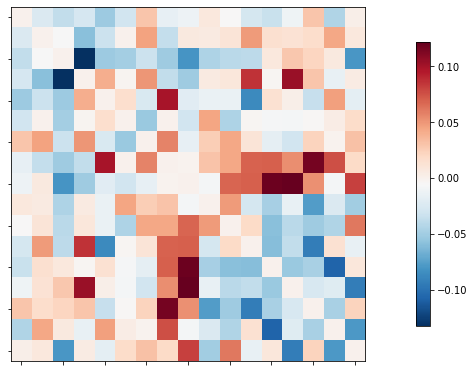

In [70]:
plotting.plot_matrix(r_out)

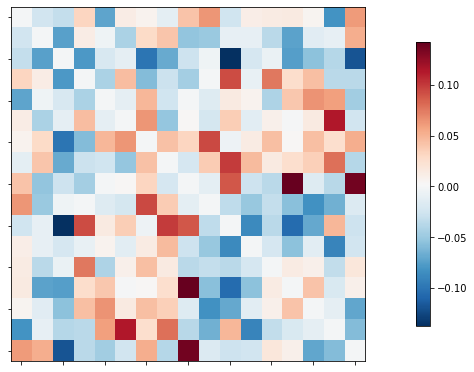

In [81]:
plotting.plot_matrix(r_out)

In [75]:
from nilearn import datasets

yeo = datasets.fetch_atlas_yeo_2011()
atlas_yeo = yeo.thick_17